**Credit Card Fraud Detection Model**

**Problem Statement**

Develop a machine learning model that can accurately predict fraudulent credit card transactions using a Kaggle dataset. The model should be able to identify patterns and anomalies in the data that can help detect fraudulent transactions in real-time, reducing financial losses and improving customer trust for banks and financial institutions.

**Project Goal**

The primary goal of a credit card fraud detection model in machine learning is to accurately identify and prevent fraudulent transactions while minimizing false positives. This involves developing a robust, real-time system that can analyze transaction data and detect suspicious activity to protect both financial institutions and cardholders from financial losses.

**Project Summary**

Project Description:

The credit card fraud prediction project involves developing a machine learning model that can identify fraudulent credit card transactions using a Kaggle dataset. The dataset contains 284,807 transactions, out of which 492 are fraudulent. The dataset is highly unbalanced, with a large number of legitimate transactions and a small number of fraudulent transactions.

Objective:

The objective of this project is to predict fraudulent credit card transactions using machine learning models. The goal is to develop a model that can accurately classify transactions as either fraudulent or legitimate, reducing financial losses and improving customer trust for banks and financial institution

Dataset:

The project uses the Credit Card Fraud Detection dataset from Kaggle, which contains 284,807 credit card transactions made by European cardholders over a period of two days in September 2013. The dataset is highly unbalanced, with 492 fraudulent transactions (0.172% of the total transactions


**Import Essential Libraries**

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
credit_card_data = pd.read_csv(r"/content/creditcard.csv")

In [47]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [48]:
credit_card_data.sample()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5067,4699,1.3288,-0.64708,-0.504547,-1.558072,-0.203398,-0.259578,-0.179923,-0.30882,1.033241,...,-0.497902,-0.587049,-0.336543,-0.864266,0.968195,-0.543732,0.024842,0.00311,75.0,0.0


**Informtion about the Dataset**

In [49]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

**Checking Missing values**

In [50]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


<Axes: >

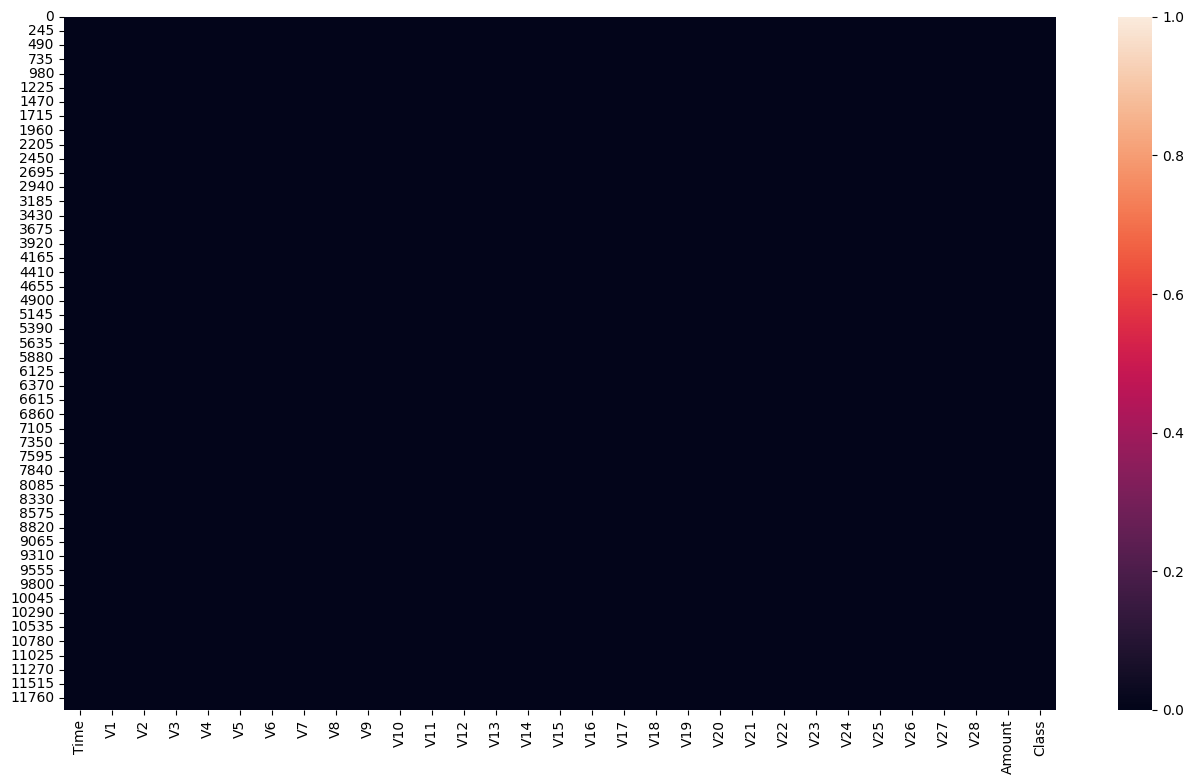

In [51]:
plt.figure(figsize=(16,9))
sns.heatmap(credit_card_data.isnull())

In [52]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0.0,11906
1.0,52


In [54]:
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data['Class']==1]

In [55]:
fraud['Class']

,Class
541,1.0
623,1.0
4920,1.0
6108,1.0
6329,1.0
6331,1.0
6334,1.0
6336,1.0
6338,1.0
6427,1.0


**Statistical measures of the data**

In [56]:
legit.Amount.describe()

,Amount
count,11906.000000
mean,62.198127
std,177.379105
min,0.000000
25%,5.292500
50%,15.950000
75%,50.000000
max,7712.430000


In [57]:
fraud.Amount.describe()

,Amount
count,52.000000
mean,97.724808
std,321.188775
min,0.000000
25%,1.000000
50%,1.000000
75%,1.772500
max,1809.680000


**Handling Missing Values**

In [59]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,7993.389048,-0.200839,0.259753,0.929229,0.255987,-0.076685,0.149326,-0.097364,-0.053087,0.927305,...,0.020836,-0.063076,-0.154427,-0.032369,0.018962,0.105861,0.061825,0.005330,0.000012,62.198127
1.0,11569.615385,-3.769104,4.258027,-8.202329,6.396396,-2.342431,-1.990562,-5.740207,0.950650,-2.729769,...,0.411236,0.305259,-0.021762,-0.340563,-0.406311,-0.139505,0.306967,0.692927,0.059751,97.724808


In [63]:
legit_sample = legit.sample(n=492)

In [61]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [62]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3452,2940,-0.439824,0.581561,1.269115,-1.945840,-0.020154,-1.371057,1.016856,-0.262751,0.995704,...,0.107704,0.657713,-0.184671,0.575560,-0.115917,-0.838270,0.247315,-0.014565,1.00,0.0
7882,10951,1.171716,-0.094357,0.960922,0.267190,-0.907105,-0.629010,-0.543630,-0.053474,1.506755,...,0.000564,0.189459,-0.006658,0.557558,0.136481,1.000646,-0.096673,-0.001258,24.95,0.0
9861,14532,1.183594,-0.082875,0.736538,0.081360,-0.401886,0.148805,-0.601341,0.084268,1.446284,...,-0.004884,0.262987,-0.042969,-0.282364,0.158542,1.062763,-0.075016,-0.010410,15.95,0.0
1051,795,-0.144482,0.863757,0.515588,1.048440,0.628851,-1.404999,1.202639,-0.598858,-0.467957,...,0.109462,0.809646,0.300960,0.749911,-0.684059,-0.467782,0.191552,-0.024130,0.89,0.0
6784,8548,1.170898,0.503802,0.732951,2.326867,0.482490,1.086716,-0.348989,0.095922,0.745395,...,-0.263888,-0.512865,-0.065782,-1.381371,0.326016,-0.076221,0.010005,0.018831,26.97,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10897,18690,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,...,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.00,1.0
11343,19762,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,-6.380125,...,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,1.00,1.0
11710,20011,-14.724627,7.875157,-21.872317,11.906170,-8.348734,-2.262846,-15.833443,0.077874,-6.356833,...,-2.362345,1.099557,1.037199,-1.036359,-0.254777,0.642343,2.161129,-1.401282,1.00,1.0
11841,20332,-15.271362,8.326581,-22.338591,11.885313,-8.721334,-2.324307,-16.196419,0.512882,-6.333685,...,-2.356896,1.068019,1.085617,-1.039797,-0.182006,0.649921,2.149247,-1.406811,1.00,1.0


In [66]:
new_df['Class'].value_counts()

,count
Class,
0.0,492
1.0,52


In [67]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,7808.790650,-0.264026,0.228847,0.934804,0.182198,-0.205228,0.196945,-0.109328,-0.052891,0.903734,...,-0.006052,-0.004496,-0.150612,-0.044765,-0.038568,0.082422,0.066264,0.010894,0.033371,77.116626
1.0,11569.615385,-3.769104,4.258027,-8.202329,6.396396,-2.342431,-1.990562,-5.740207,0.950650,-2.729769,...,0.411236,0.305259,-0.021762,-0.340563,-0.406311,-0.139505,0.306967,0.692927,0.059751,97.724808


In [68]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

**Model Building**

In [71]:
model=LogisticRegression()

**Training the Model**

In [72]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9908045977011494


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Accuracy test**

In [73]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9908256880733946


Accuracy score on Test Data : 0.9908256880733946